## 04-07-25
Creare OU con gamma=0.1 e T=10^5 con metodologia time-average. Poi fare lo stesso con metodologia ensemble-average e valutare quando per lag tau=30 hanno ac comparabile

In [ ]:
import numpy as np, matplotlib.pyplot as plt

In [2]:
def ac_time_average(x, tau):
    T = len(x)
    mean = np.mean(x)
    var = np.var(x)

    prod = (x[:T-tau]-mean)*(x[tau:]-mean)
    ac = np.mean(prod)/var

    return ac

In [ ]:
T_tot = 10**5
dt = 0.1
T = int(T_tot/dt)
tau = 30

# Time-Average
x = np.zeros(T)
x[0] = 0.1

mu = 0.0 
sigma = 1.0 # Intensità rumore
gamma = 0.1 

for t in range(1,T):
    noise = np.random.normal(0, np.sqrt(2*dt))
    x[t] = x[t-1] - gamma*dt*(x[t-1]-mu) + sigma*noise

ac_time = ac_time_average(x, tau)

print(f"L'autocorrelazione time-average è: {ac_time:.6}")

L'autocorrelazione time-average è: 0.741763


In [ ]:
def create_ensemble(N):
    # Ensemble-Average
    X = np.zeros((N,T))
    X[:,0] = 0.1

    mu = 0.0
    sigma = 1.0
    gamma = 0.1

    for i in range(N):
        for t in range(1,T):
            noise = np.random.normal(0, np.sqrt(2*dt))
            X[i,t] = X[i,t-1] - gamma*dt*(X[i,t-1]-mu) + sigma*noise

    return X

In [24]:
def ac_ensemble_average(X,tau):
    N, T = X.shape

    means = np.mean(X, axis=1, keepdims=True)
    varsx = np.var(X, axis=1, keepdims=True)
    Xc = X - means
    
    numeratori = np.sum(Xc[:, :T-tau]*Xc[:, tau:], axis=1)
    denominatori = (T-tau)*varsx.flatten()
    ac_tau = numeratori/denominatori

    return np.mean(ac_tau), np.std(ac_tau)

In [25]:
N = 1

while True:
    X = create_ensemble(N)
    ac_ens, d_ac_ens = ac_ensemble_average(X,tau)

    if np.abs(ac_ens-ac_time) < d_ac_ens:
        break

    if N>100:
        break

    N = N+1

print(N)
print(f"L'autocorrelazione ensemble-average è: {ac_ens:.6} pm {d_ac_ens:.6}")

2
L'autocorrelazione ensemble-average è: 0.737296 pm 0.00446627


<function matplotlib.pyplot.show(close=None, block=None)>

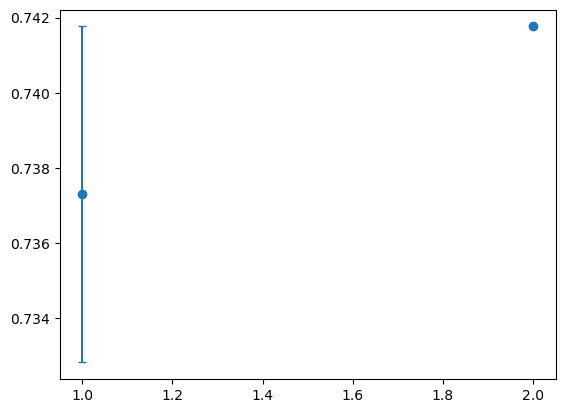

In [26]:
plt.errorbar(1, ac_ens, d_ac_ens, fmt='o', capsize = 3)
plt.scatter(2, ac_time)
plt.show